In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from IPython import display
import collections
from time import time
from itertools import chain
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import seaborn as sns
import qgrid
import datetime
import sympy as S
import scipy
#import probability

In [5]:
cd /home/vinay/airbnb/code

/home/vinay/airbnb/code


In [117]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 2000)

data_list = pd.read_csv("../seattlelistings.csv")
data_cal = pd.read_csv("../seattlecalendar.csv")
data_rev = pd.read_csv("../seattlereviews.csv")

data_list['price'] = (data_list['price'].str.replace('$', ''))
data_list['price'] = (data_list['price'].str.replace('.00', ''))

data_list['price'] = pd.to_numeric(data_list['price'])

data_cal['price'] = (data_cal['price'].str.replace('$', ''))
data_cal['price'] = (data_cal['price'].str.replace('.00', ''))
data_cal['price'] = (data_cal['price'].str.replace(',', ''))

data_cal['price'] = pd.to_numeric(data_cal['price'])

data_cal=data_cal.drop(columns='price')


In [118]:
data_cal.rename(columns={'listing_id': 'id'},inplace=True)

In [119]:
data_list=data_list[['id','price']]

data_final = pd.merge(data_cal, data_list, how='left', on=['id'])

In [121]:
result_price_xavailable=data_final[data_final['available']=='f']
result_price_xavailable=result_price_xavailable.groupby('date')['price'].mean()

In [102]:
import thinkstats2
import thinkplot

In [103]:
cdf = thinkstats2.Cdf(data_list.price, label='Price')

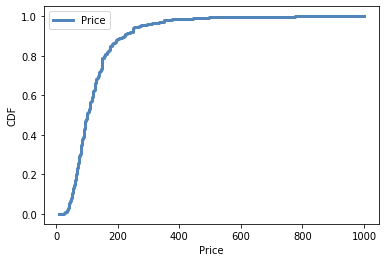

<Figure size 576x432 with 0 Axes>

In [104]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([cdf])
thinkplot.Show(xlabel='Price', ylabel='CDF')

In [108]:
#data_cal['price'].fillna(0, inplace=True)
data_cal = data_cal[pd.notnull(data_cal['price'])]

In [113]:
data_graph = data_cal.groupby(data_cal['date'])['price'].mean().sort_values()

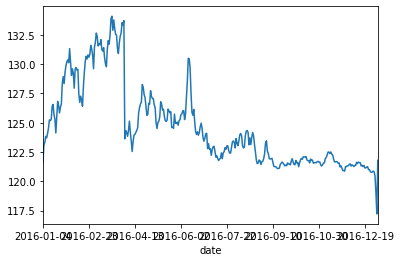

In [123]:
ax = plt.gca()

result_price_xavailable.plot(kind='line',y='price',ax=ax)

plt.show()

In [97]:
data_list[['id','price']]

,id,price
0,241032,85.0
1,953595,150.0
2,3308979,975.0
3,7421966,NaN
4,278830,450.0
...,...,...
3813,8101950,359.0
3814,8902327,79.0
3815,10267360,93.0
3816,9604740,99.0


In [110]:
data_cal

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
9,241032,2016-01-13,t,85.0
10,241032,2016-01-14,t,85.0
14,241032,2016-01-18,t,85.0
...,...,...,...,...
1393207,10208623,2016-01-06,t,87.0
1393208,10208623,2016-01-07,t,87.0
1393211,10208623,2016-01-10,t,87.0
1393212,10208623,2016-01-11,t,87.0


In [122]:
result_price_xavailable

date
2016-01-04    121.571952
2016-01-05    123.085523
2016-01-06    123.307650
2016-01-07    123.834490
2016-01-08    123.704874
                 ...    
2016-12-29    120.808204
2016-12-30    120.468227
2016-12-31    119.059226
2017-01-01    117.209246
2017-01-02    121.786902
Name: price, Length: 365, dtype: float64

In [ ]:
# prepare from listing dataframe and then drop price from calendar. Join calendar to listing. Find a mean of price, change date to yyyy-mm then draw a graph